In [1]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import numpy as np
import time
import pandas as pd
from tqdm import tqdm
import scipy.signal


            minx          miny           maxx          maxy
0 -698116.649334  7.050026e+06 -696649.172642  7.050929e+06


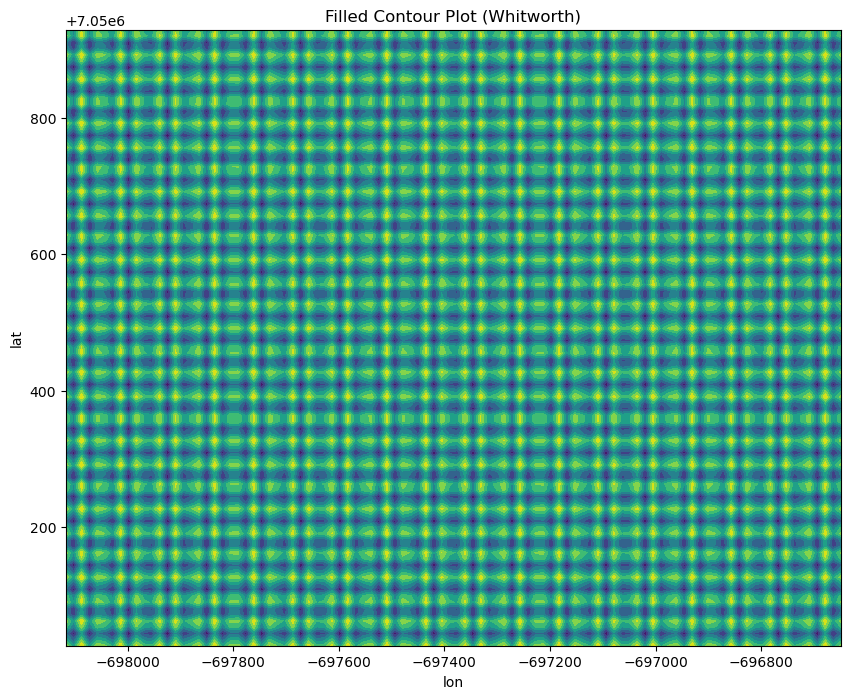

In [122]:
poly = gpd.read_file("polygons/whitworth.geojson").to_crs(3857)
#cx.add_basemap(ax, crs='EPSG:3857', attribution=False, source=cx.providers.CartoDB.Voyager)
print(poly.bounds)
minx = poly.total_bounds[0]
miny = poly.total_bounds[1]
maxx = poly.total_bounds[2]
maxy = poly.total_bounds[3]

feature_x = np.linspace(minx, maxx, 100)
feature_y = np.linspace(miny, maxy, 100)

[X, Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1,1,figsize=(10,8))

Z = np.cos(X / 4) + np.sin(Y / 2) 

# contour plot
ax.contourf(X, Y, Z)
#poly.plot(ax=ax, edgecolor='black', facecolor='red')

ax.set_title('Filled Contour Plot (Whitworth)')
ax.set_xlabel('lon')
ax.set_ylabel('lat')

plt.show()

xrange: 0.8443906
yrange: 0.40511399999999753


Text(0.5, 1.0, 'contourf figure with Nlevels=10')

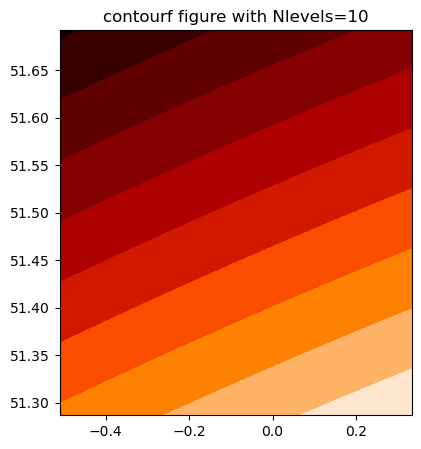

In [83]:
from shapely import geometry
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import fiona
import os,json
from descartes.patch import PolygonPatch

poly = gpd.read_file("polygons/london.geojson").to_crs(4326)
#cx.add_basemap(ax, crs='EPSG:3857', attribution=False, source=cx.providers.CartoDB.Voyager)

minx = poly.total_bounds[0]
miny = poly.total_bounds[1]
maxx = poly.total_bounds[2]
maxy = poly.total_bounds[3]

# create some test data with multiple peaks
lon = np.linspace(0,45,100)
lat = np.linspace(-20,32,90)

lon = np.linspace(minx,maxx,100)
lat = np.linspace(miny,maxy,90)

print("xrange:", maxx-minx)
print("yrange:", maxy-miny)

long,latg=np.meshgrid(lon,lat)
C1=np.sqrt((long-5.)**2+(latg-25)**2)/30
C2=np.sqrt((long-30.)**2+(latg-1)**2)/10
m = 30*np.exp(-C1**2)+20.*np.exp(-C2**2)

# make the contourf plot, storing the resulting ContourSet in cs
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
Nlevels=10
cs = plt.contourf(lon,lat,m,Nlevels,cmap='gist_heat')
plt.title('contourf figure with Nlevels='+str(Nlevels))